In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('./titanic.csv', header=0)
df = df.drop(['Name', 'Ticket', 'Cabin', 'Parch'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'male' else 0)
df = df.dropna()
df = pd.get_dummies(df, columns=['Embarked'], dummy_na=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Fare           889 non-null float64
Embarked_C     889 non-null uint8
Embarked_Q     889 non-null uint8
Embarked_S     889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [23]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,7.2500,0,0,1
1,2,1,1,0,38.0,1,71.2833,1,0,0
2,3,1,3,0,26.0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,53.1000,0,0,1
4,5,0,3,1,35.0,0,8.0500,0,0,1


In [24]:
X = df.loc[:, df.columns.difference(['Survived'])].values
Y = df['Survived'].values

In [34]:
cv_scores=[]
for k in range(1,51, 10):
    clf = RandomForestClassifier(n_estimators=k, random_state=56, verbose=0, n_jobs=3)
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(clf, X, Y, cv=kf, scoring='roc_auc')
    cv_scores.append([k, scores.mean(), scores.std()])
df_scores = pd.DataFrame(cv_scores, columns=['k', 'roc_auc_score', 'STD'])

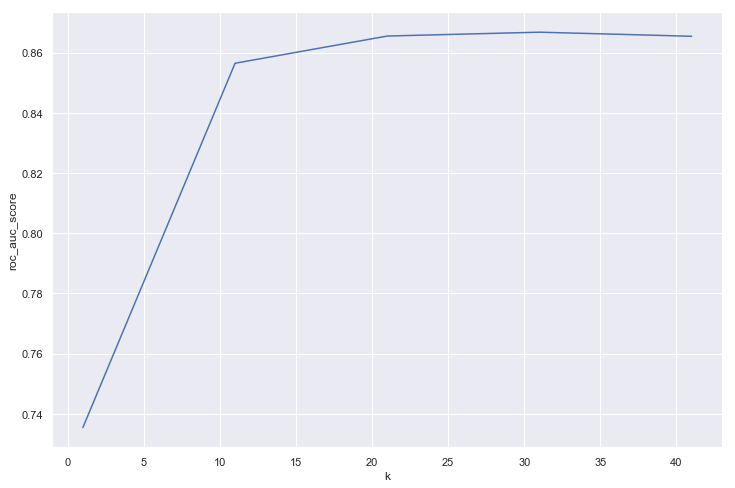

In [35]:
sns.lineplot(x="k", y="roc_auc_score", data=df_scores)

In [41]:
%%time
rf = RandomForestClassifier(n_estimators=1, random_state=42, verbose=0, n_jobs=3)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
parameters = {'n_estimators': range(50,151, 50),
              'max_depth': [1,3,5,7], 
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[2,4,6] }
clf = GridSearchCV(rf, parameters, cv=kf, scoring='roc_auc')
clf.fit(X, Y)

Wall time: 2min 59s


In [42]:
clf.best_params_ 

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
rf_clf = clf.best_estimator_ 

In [49]:
pd.DataFrame(clf.cv_results_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
mean_fit_time              108 non-null float64
mean_score_time            108 non-null float64
mean_test_score            108 non-null float64
mean_train_score           108 non-null float64
param_max_depth            108 non-null object
param_min_samples_leaf     108 non-null object
param_min_samples_split    108 non-null object
param_n_estimators         108 non-null object
params                     108 non-null object
rank_test_score            108 non-null int32
split0_test_score          108 non-null float64
split0_train_score         108 non-null float64
split1_test_score          108 non-null float64
split1_train_score         108 non-null float64
split2_test_score          108 non-null float64
split2_train_score         108 non-null float64
split3_test_score          108 non-null float64
split3_train_score         108 non-null float64
split4_test_score          108 non-nul

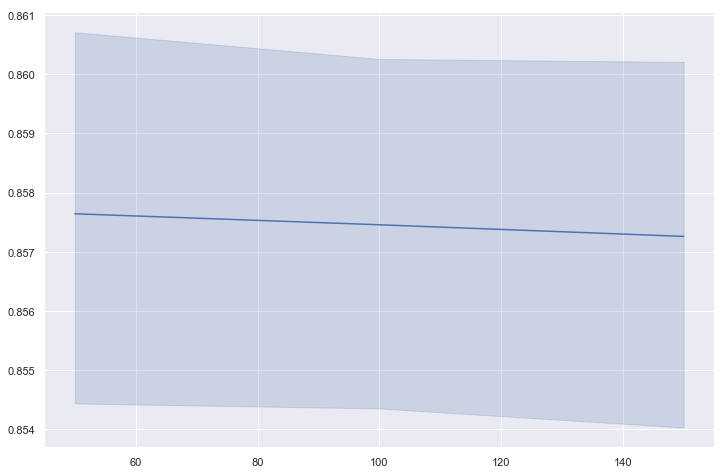

In [50]:
sns.lineplot(x="param_n_estimators", y="mean_test_score", data=clf.cv_results_)